### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


---




Given a matrix *A* of shape $(n * k)$ and matrix *B* of shape $(k * m)$ , the resultant matrix *C* will have a shape $(m *  n)$ 

⟹ every element in row of size $k$ multiples with every element of column of size $k$  which is $k$ times of multiplication. And we need to do this for $n*m$ times. Therefore we need $(n*m*k)$ times multiplication.

⟹ Similarly, for every $k$ multiplications, we need to add those elements $k-1$ times, which implies a total of $(n*m*k-1)$ additions.



### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

---






In [5]:
def multiply_lists(la, lb):
  result = [[0 for _ in range(len(lb[0]))] for _ in range(len(la))]
  for i in range(len(la)):
    for j in range(len(lb[0])):
      for k in range(len(lb)):
          result[i][j] += la[i][k] * lb[k][j]
  return result

def multiply_arr(arr1, arr2):
  #np.matmult(arr1, arr2)
  result = arr1 @ arr2
  return result

In [6]:

import random
#list1
list1 =[]
for i in range(3):
  randomlist = random.sample(range(10, 99), 2)
  list1.append(randomlist)
print(list1)

#list2
list2 =[]
for i in range(2):
  randomlist = random.sample(range(10, 99), 3)
  list2.append(randomlist)
print(list2)

print("-----------------------------------------")
import numpy as np

array1 = np.random.randint((100), size=(3, 2))
array2 = np.random.randint((100), size=(2, 3))

print(array1)
print(array2)



[[92, 42], [80, 31], [86, 47]]
[[43, 33, 10], [55, 93, 47]]
-----------------------------------------
[[63 35]
 [88  8]
 [16 45]]
[[96 45 70]
 [14 52 27]]


In [7]:
print(multiply_lists(list1, list2))
print(multiply_arr(array1, array2))

[[6266, 6942, 2894], [5145, 5523, 2257], [6283, 7209, 3069]]
[[6538 4655 5355]
 [8560 4376 6376]
 [2166 3060 2335]]


In [8]:
import timeit
print(timeit.timeit(lambda: multiply_lists(list1, list2), number=10000))
print(timeit.timeit(lambda: multiply_arr(array1, array2), number=10000))

0.08665257999973619
0.017446228000153496


In [9]:
%timeit -n 100 -r 5 multiply_lists(list1, list2)
%timeit -n 100 -r 5 multiply_arr(array1, array2)

11 µs ± 4.04 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
2.21 µs ± 1.06 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)


#### The Numpy Array multiplication is faster the python list because:#
* Numpy array is implemented in C and takes advantage of optimized linear algebra operations and also arrays are collection of homogeneous data-types that are stored in contiguous memory locations whereas list operations requires more looping and explicit element-wise operations.
* The NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.







### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against **numpy.median** routine in terms of time?

---



In [10]:
#We are considering that the list is of ODD size
import numpy as np
import sys
def find_median_pass(la):
  maxi = max(la)
  maxi2 = -sys.maxsize
  
  l = len(la)//2

  for i in range(l):
    for j in range(len(la)):
      if la[j] > maxi2 and la[j]<maxi:
        maxi2 = la[j]
    maxi = maxi2
    maxi2 = -sys.maxsize
  return maxi
       


#1st method
# We can find the nth element of the list by firstly sorting the list and printing the n-1 indexed element. The time complexity using this method will be O (N log(N)).
def find_median_by_sorting(la):
  n = len(la)
  pos_mid = n//2
  la.sort()
  return (la[-pos_mid-1])


#2nd method 
# Using MinHeap of size Half of the list
import heapq as hq
def find_median_meanheap(la):
  n = len(la)
  k = n//2 + 1
  minHeap = []
 
  for i in range(k):
    minHeap.append(la[i])
  hq.heapify(minHeap)

  for i in range(k, n):
      if minHeap[0] > la[i]:
          continue
      else:
            # deleting top element of the min heap
          minHeap[0] = minHeap[-1]
          minHeap.pop()
          minHeap.append(la[i])
          hq.heapify(minHeap)
  # Now min heap contains k maximum
  return (min(minHeap))

def find_median_numpy(la):
  return np.median(la)

import random
randomlist = random.sample(range(10, 999), 91) #odd number
#print(f'Randomlist:\n{randomlist}')
print(find_median_by_sorting(randomlist))

#2nd method ( Efficient in time)
print(find_median_meanheap(randomlist))

#numpy median
print(find_median_numpy(randomlist))


array1 = np.random.randint(10,999,91)

#timing
print("find_median_pass")
%timeit -n 100 -r 5 find_median_pass(randomlist)
print("find_median_by_sorting")
%timeit -n 100 -r 5 find_median_by_sorting(randomlist)
print("find_median_meanheap")
%timeit -n 100 -r 5 find_median_meanheap(randomlist)
print("find_median_numpy using list")
%timeit -n 100 -r 5 find_median_numpy(randomlist)
print("find_median_numpy using array")
%timeit -n 100 -r 5 find_median_numpy(array1)


463
463
463.0
find_median_pass
444 µs ± 20.1 µs per loop (mean ± std. dev. of 5 runs, 100 loops each)
find_median_by_sorting
667 ns ± 120 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
find_median_meanheap
62.2 µs ± 410 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
find_median_numpy using list
21.5 µs ± 860 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)
find_median_numpy using array
15.9 µs ± 496 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)


### 4. What is the gradient of the following function with respect to x and y?
####$x^{2}$$y$ + $y^3$$sin(x)$     

---




The partial derivative of the function with respect to x is:
#####$2xy$ + $y^3cos(x)$

The partial derivative of the function with respect to y is:
#####$x^2$+ $3y^2sin(x)$

Therefore, the gradient of the function with respect to x and y is:

#####$[2x y + y^3 cos(x), x^2 + 3y^2 sin(x)]$

In [11]:
import math
def fun(x, y):
  print([2*x*y+y**3*math.cos(x), x**2+3*y**2*math.sin(x)])

fun(0.0,1.0)
fun(1.0,2.0)
fun(-1.0,1.0)

[1.0, 0.0]
[8.322418446945118, 11.097651817694757]
[-1.4596976941318602, -1.5244129544236893]


### 5. Use **JAX** to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of $x$ and $y$

---



In [12]:
import math
import jax.numpy as jnp
from jax import grad

def f(a):
  x=a[0]
  y=a[1]
  return (x**2 * y + y**3 * jnp.sin(x))


ans = grad(f,argnums=0)
a = (0.0,1.0) #change the values of x and y according to your need
b = (1.0, 2.0)
c = (-1.0, 1.0)

print(ans(a)) 
print(ans(b)) 
print(ans(c)) 
 



(DeviceArray(1., dtype=float32, weak_type=True), DeviceArray(0., dtype=float32, weak_type=True))
(DeviceArray(8.322418, dtype=float32, weak_type=True), DeviceArray(11.0976515, dtype=float32, weak_type=True))
(DeviceArray(-1.4596977, dtype=float32, weak_type=True), DeviceArray(-1.5244129, dtype=float32, weak_type=True))


### 6. Use **sympy** to confirm that you obtain the same gradient analytically.

---



In [13]:
import sympy as sy
from sympy import * 
x,y = sy.symbols('x y')
func = (x**2)*y + (y**3) * sy.sin(x) 

x_dx = sy.diff(func,x)
y_dy = sy.diff(func,y)

print(x_dx)
print(y_dy)



2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


### 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
>1. Branch 1
  >> 1. Roll Number: 1
  >> 2. Name: N
  >> 3. Marks:
    >>>Maths: 100, English: 70 …
>2. Branch 2

2. 2023
>1. Branch 1 
>2. Branch 2
3. 2024
>1. Branch 1
>2. Branch 2
4. 2025
>1. Branch 1
>2. Branch 2

---



In [14]:
import pprint
dict = {
    "2022" : {
        "Branch1": {
            "Roll Number" : 1,
            "Name": "ABC",
            "Marks": {
                  "Maths" : 80,
                  "Science" : 40,
                  "English" : 75
                           }},
      "Branch2": {
            "Roll Number" : 2,
            "Name": "BCD",
            "Marks": {
                  "Maths" : 60,
                  "Science" : 90,
                  "English" : 55
                           }}},
        "2023" : {
        "Branch1": {
            "Roll Number" : 3,
            "Name": "efg",
            "Marks": {
                  "Maths" : 60,
                  "Science" : 80,
                  "English" : 25
                           }},
      "Branch2": {
            "Roll Number" : 4,
            "Name": "MNO",
            "Marks": {
                  "Maths" : 66,
                  "Science" : 97,
                  "English" : 55
                           }}},
        "2024" : {
        "Branch1": {
            "Roll Number" : 5,
            "Name": "IOY",
            "Marks": {
                  "Maths" : 60,
                  "Science" : 80,
                  "English" : 25
                           }},
      "Branch2": {
            "Roll Number" : 6,
            "Name": "VWX",
            "Marks": {
                  "Maths" : 66,
                  "Science" : 97,
                  "English" : 55
                           }}},
        "2025" : {
        "Branch1": {
            "Roll Number" : 7,
            "Name": "JKL",
            "Marks": {
                  "Maths" : 77,
                  "Science" : 88,
                  "English" : 75
                           }},
      "Branch2": {
            "Roll Number" : 8,
            "Name": "WXY",
            "Marks": {
                  "Maths" : 69,
                  "Science" : 99,
                  "English" : 54
                           }}}
        }
pprint.pprint(dict)
  

{'2022': {'Branch1': {'Marks': {'English': 75, 'Maths': 80, 'Science': 40},
                      'Name': 'ABC',
                      'Roll Number': 1},
          'Branch2': {'Marks': {'English': 55, 'Maths': 60, 'Science': 90},
                      'Name': 'BCD',
                      'Roll Number': 2}},
 '2023': {'Branch1': {'Marks': {'English': 25, 'Maths': 60, 'Science': 80},
                      'Name': 'efg',
                      'Roll Number': 3},
          'Branch2': {'Marks': {'English': 55, 'Maths': 66, 'Science': 97},
                      'Name': 'MNO',
                      'Roll Number': 4}},
 '2024': {'Branch1': {'Marks': {'English': 25, 'Maths': 60, 'Science': 80},
                      'Name': 'IOY',
                      'Roll Number': 5},
          'Branch2': {'Marks': {'English': 55, 'Maths': 66, 'Science': 97},
                      'Name': 'VWX',
                      'Roll Number': 6}},
 '2025': {'Branch1': {'Marks': {'English': 75, 'Maths': 77, 'Science': 88

### 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



---



In [15]:
class Year:
  def __init__(self, year):
    self.year = year
    self.branch = None
  def show(self):
    print("Year", self.year)
    
  class Branches:
    def __init__(self, name ):
      self.name = name
      self.student = None

    def show(self):
      print("brancName",self.name)

    class Students:
      def __init__(self, name, roll):
        self.name = name      
        self.roll = roll
        self.mark = None
      def show(self):
        print("name of student", self.name)
        print("roll number", self.roll)
      
      class Marks:
        def __init__(self, maths, scienc):
          self.math = maths
          self.scienc = scienc
        def show(self):
          print("marks in maths", self.math)
          print("mark in science", self.scienc)

mar = Year(2020)
mar.show()
branch= mar.Branches("Branch1")
branch.show()
stud = branch.Students("rajesh", 2210057)
stud.show()
mark= stud.Marks(50,60)
mark.show()


Year 2020
brancName Branch1
name of student rajesh
roll number 2210057
marks in maths 50
mark in science 60


### 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

 


---



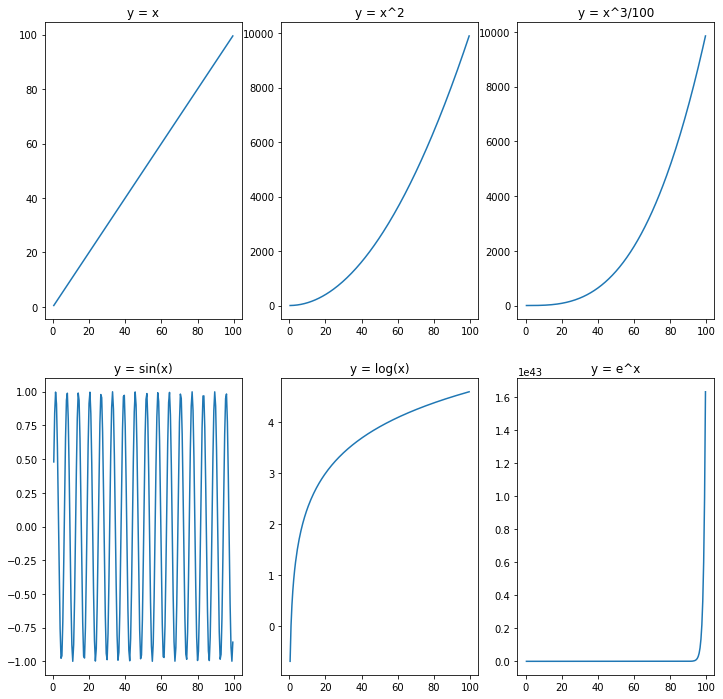

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = x**3 /100
y4 = np.sin(x)
y5 = np.log(x)
y6 = np.exp(x)

fig, axs = plt.subplots(2,3,figsize=(12,12))

# Plot the functions
axs[0][0].plot(x, y1)
axs[0][0].title.set_text("y = x")

axs[0][1].plot(x, y2)
axs[0][1].title.set_text("y = x^2")

axs[0][2].plot(x, y3)
axs[0][2].title.set_text("y = x^3/100")

axs[1][0].plot(x, y4)
axs[1][0].title.set_text("y = sin(x)")

axs[1][1].plot(x, y5)
axs[1][1].title.set_text("y = log(x)")

axs[1][2].plot(x, y6)
axs[1][2].title.set_text("y = e^x")




# Show the plot
plt.show()



### 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

---



In [17]:
matrix = np.random.uniform(1, 2, size=(20, 5))

In [18]:


import pandas as pd
df = pd.DataFrame(matrix)
df.columns = ['a','b','c','d','e']
df.head()

,a,b,c,d,e
0,1.097968,1.998754,1.622022,1.794227,1.089263
1,1.853579,1.089067,1.011349,1.343491,1.208190
2,1.864266,1.424824,1.448066,1.664031,1.263120
3,1.384609,1.558355,1.553565,1.707117,1.672489
4,1.002325,1.846162,1.050322,1.957238,1.028588


In [19]:
#Find the column with the highest standard deviation
all_std = df.std()
print(all_std)
all_std.idxmax()

a    0.336498
b    0.312587
c    0.299112
d    0.303991
e    0.327437
dtype: float64


'a'

In [20]:
#Find the row with the lowest mean
df['mean'] = df.iloc[:, :].mean(axis=1)
df


,a,b,c,d,e,mean
0,1.097968,1.998754,1.622022,1.794227,1.089263,1.520447
1,1.853579,1.089067,1.011349,1.343491,1.208190,1.301135
2,1.864266,1.424824,1.448066,1.664031,1.263120,1.532861
3,1.384609,1.558355,1.553565,1.707117,1.672489,1.575227
4,1.002325,1.846162,1.050322,1.957238,1.028588,1.376927
5,1.289893,1.742594,1.863078,1.675975,1.300072,1.574322
6,1.348792,1.412973,1.737232,1.289559,1.127324,1.383176
7,1.877351,1.798785,1.513974,1.284631,1.898198,1.674588
8,1.150198,1.050502,1.780078,1.936375,1.078103,1.399051
9,1.743891,1.093638,1.013041,1.019150,1.995236,1.372991


In [21]:
df['mean'].idxmin()

1

### 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

---



In [22]:
df['f'] = df[['a','b','c','d','e']].sum(axis=1)
df

,a,b,c,d,e,mean,f
0,1.097968,1.998754,1.622022,1.794227,1.089263,1.520447,7.602233
1,1.853579,1.089067,1.011349,1.343491,1.208190,1.301135,6.505676
2,1.864266,1.424824,1.448066,1.664031,1.263120,1.532861,7.664306
3,1.384609,1.558355,1.553565,1.707117,1.672489,1.575227,7.876135
4,1.002325,1.846162,1.050322,1.957238,1.028588,1.376927,6.884635
5,1.289893,1.742594,1.863078,1.675975,1.300072,1.574322,7.871612
6,1.348792,1.412973,1.737232,1.289559,1.127324,1.383176,6.915880
7,1.877351,1.798785,1.513974,1.284631,1.898198,1.674588,8.372939
8,1.150198,1.050502,1.780078,1.936375,1.078103,1.399051,6.995256
9,1.743891,1.093638,1.013041,1.019150,1.995236,1.372991,6.864956


In [23]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

In [24]:
df

,a,b,c,d,e,mean,f,g
0,1.097968,1.998754,1.622022,1.794227,1.089263,1.520447,7.602233,LT8
1,1.853579,1.089067,1.011349,1.343491,1.208190,1.301135,6.505676,LT8
2,1.864266,1.424824,1.448066,1.664031,1.263120,1.532861,7.664306,LT8
3,1.384609,1.558355,1.553565,1.707117,1.672489,1.575227,7.876135,LT8
4,1.002325,1.846162,1.050322,1.957238,1.028588,1.376927,6.884635,LT8
5,1.289893,1.742594,1.863078,1.675975,1.300072,1.574322,7.871612,LT8
6,1.348792,1.412973,1.737232,1.289559,1.127324,1.383176,6.915880,LT8
7,1.877351,1.798785,1.513974,1.284631,1.898198,1.674588,8.372939,GT8
8,1.150198,1.050502,1.780078,1.936375,1.078103,1.399051,6.995256,LT8
9,1.743891,1.093638,1.013041,1.019150,1.995236,1.372991,6.864956,LT8


In [25]:
num_lt8 = df[df['g'] == 'LT8'].shape[0]
num_lt8

15

In [26]:
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_lt8

0.49582641137840217

In [27]:
std_gt8 = df[df['g'] == 'GT8']['f'].std()
std_gt8

0.24164864317416393

### 12. Write a small piece of code to explain broadcasting in numpy.

---



Brodcasting in numpy refers to the ability of NumPy to consider arrays of different shapes for an arithmetic operations. Arrays with different shapes can be combined together if they are "broadcastable". 

In [28]:
#Sample example for broadcasting
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
print(f'Array a:\n{a}')

b = np.array([10, 20, 30])
print(f'Array b:\n{b}')

c = a + b
print(f'Array c:\n{c}')

Array a:
[[1 2 3]
 [4 5 6]]
Array b:
[10 20 30]
Array c:
[[11 22 33]
 [14 25 36]]


### 13. Write a function to compute the **argmin** of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

---



In [29]:
import numpy as np
def amin(arr):
  min = max(arr)
  for i in range(len(arr)):
    if(arr[i] < min):
      min = arr[i]
      pos = i
  return pos

arr = np.array([20, 10, 2, 5 , 7 , 8])
print(amin(arr))
print(np.argmin(arr))


2
2
